# Airbnb NYC Rental Price Prediction
## 1. Domain Understanding
As of August 2019, the data set contains almost 50 thousand airbnb listings in NYC. The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external dataset(s) with relevant information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
#checking the size to get idea the size of data
df = pd.read_csv('AB_NYC_2019.csv')
df.shape

(48895, 16)

## 2. Data Exploration and Collection

In [3]:
#checking type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


id and name

In [5]:
#checking all numerical value
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


All numerical data seem to be good. No outlier

In [6]:
#check value of neighbourhood_group to check if there is unwanted character
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [7]:
#check value of neighbourhood to check if there is unwanted character
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Neighbourhood has so many categorical values. Need to be analysed more.

In [8]:
#check value of room_type to check if there is unwanted character
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

## 3. Data Cleaning

In [9]:
#checking duplicated values
df.duplicated().sum()

0

In [10]:
#checking null value
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
#null values of reviews_per_month to be fill with 0
df['reviews_per_month'].fillna(0,inplace=True)

In [12]:
#converting last_review string to date
import datetime
df['last_review']=pd.to_datetime(df['last_review'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [14]:
#creating new feature recent_review_days
today = datetime.datetime(2020, 6, 19)
df['last_review_days'] = today-df['last_review']

In [15]:
#checking the stats of last_review_days
df['last_review_days'].describe()

count                       38843
mean     623 days 22:12:36.089901
std      413 days 22:00:27.432207
min             347 days 00:00:00
25%             362 days 00:00:00
50%             397 days 00:00:00
75%             712 days 00:00:00
max            3371 days 00:00:00
Name: last_review_days, dtype: object

Counted values is 38843. Total value is 48895, more than 1000 data is null. Null value is defined as higher than existing highest value. It means that the resident had been last reviewed for a long time ago. Since the highest value is 3371, null value will filled by 7000.

In [16]:
#converting to numeric
df['last_review_days'] = pd.to_numeric(df['last_review_days'].dt.days, downcast='integer')

In [17]:
#checking the stats of last_review_days
df['last_review_days'].describe()

count    38843.000000
mean       623.925418
std        413.916984
min        347.000000
25%        362.000000
50%        397.000000
75%        712.000000
max       3371.000000
Name: last_review_days, dtype: float64

In [18]:
#fill null value
df['last_review_days'].fillna(7000,inplace=True)

In [19]:
#dropping unnecessary feature
df = df.drop(['id','name','host_id','host_name','last_review'],axis=1)

In [20]:
neighbourhood_count = df.groupby('neighbourhood')['neighbourhood'].agg('count').sort_values(ascending=False)
neighbourhood_count

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Willowbrook              1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

There are 221 unique values of neighbourhood. It will create model with too many dimension.

In [21]:
#we are checking neighbourhood that is counted less than 100. further it will be converted to 'Other' 
len(neighbourhood_count[neighbourhood_count<500])

197

In [22]:
#converting 'less than 100 counted' to 'Other'
df['neighbourhood'] = df['neighbourhood'].apply(lambda x: 'Other' if x in neighbourhood_count[neighbourhood_count<500] else x)

In [23]:
#checking unique values of neighbourhood
len(df['neighbourhood'].unique())

25

## 4. Feature Engineering

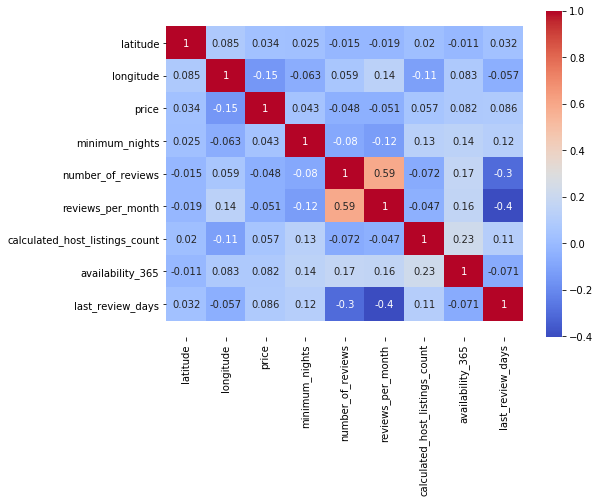

In [24]:
#check linear correlation
cor=df.corr()
plt.figure(figsize=(8,6))
ax=sns.heatmap(cor,annot=True,cmap='coolwarm')
bot,top = ax.get_ylim()
ax.set_ylim(bot+0.5, top-0.5)
plt.show()

All of features have bad correlation with price. We can say, that this model is not linear 

In [25]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'last_review_days'],
      dtype='object')

In [26]:
num=['latitude', 'longitude','minimum_nights', 'number_of_reviews','reviews_per_month',
     'calculated_host_listings_count','availability_365', 'last_review_days']
cat=['neighbourhood_group','neighbourhood','room_type']

In [27]:
#Anova analysis to check the importance of numerical features in correlatin with price
x = df[num]
y = df['price']

from sklearn.feature_selection import f_regression
fvalue,pval = f_regression(x,y)
for i in range(len(x.columns)):
    print(x.columns[i],pval[i]) 

latitude 6.070070613516523e-14
longitude 5.099264862044782e-244
minimum_nights 2.85317073145471e-21
number_of_reviews 2.6897373943434755e-26
reviews_per_month 4.683703724402456e-29
calculated_host_listings_count 4.670318676805632e-37
availability_365 2.056743270301335e-73
last_review_days 5.5587774141427445e-81


Assuming business confidence is 5%. All of numerical features are important because pvalue is lower than 5%.

In [28]:
#chi square analysis to check the importance of categorical features in correlation with price
#decoding string type categorical features
xcat = df[cat]
from sklearn.preprocessing import LabelEncoder
xcat['neighbourhood_group']= LabelEncoder().fit_transform(xcat['neighbourhood_group'])
xcat['neighbourhood']= LabelEncoder().fit_transform(xcat['neighbourhood'])
xcat['room_type']= LabelEncoder().fit_transform(xcat['room_type'])

#running chi square analysis
from sklearn.feature_selection import chi2
cval,pval = chi2(xcat,y)
for i in range(len(cat)):
    print(cat[i],' ',pval[i])

C:\Users\Juanda\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Juanda\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Juanda\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

neighbourhood_group   1.0
neighbourhood   0.0
room_type   0.0


Assuming business confidence is 5%. neighbourhood_group is unimportant for its pvalue is higher than 5%.

In [29]:
#dropping unimportant features
x= df.drop(['neighbourhood_group', 'price', 'room_type','neighbourhood'],axis=1)
y=df['price']

In [30]:
x.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_days
0,40.64749,-73.97237,1,9,0.21,6,365,609.0
1,40.75362,-73.98377,1,45,0.38,2,355,395.0
2,40.80902,-73.94190,3,0,0.00,1,365,7000.0
3,40.68514,-73.95976,1,270,4.64,1,194,350.0
4,40.79851,-73.94399,10,9,0.10,1,0,578.0


In [31]:
#encoding room_type
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
encoder = ColumnTransformer([('ohe',OneHotEncoder(),[0,3])],remainder='passthrough')
encoder.fit(x)
x2 = encoder.transform(x)
x2 = pd.DataFrame(x2)
x2.head()

,0
0,"(0, 2025)\t1.0\n (0, 19057)\t1.0\n (0, 194..."
1,"(0, 11521)\t1.0\n (0, 19093)\t1.0\n (0, 19..."
2,"(0, 16012)\t1.0\n (0, 19048)\t1.0\n (0, 19..."
3,"(0, 4964)\t1.0\n (0, 19318)\t1.0\n (0, 194..."
4,"(0, 15154)\t1.0\n (0, 19057)\t1.0\n (0, 19..."


## 5. Preprocessing of Data

In [32]:
#splitting test and train data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=5)

## 6. Apply Machine Learning Algorithm

In [33]:
#train decision tree machine 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini",max_depth=8,max_leaf_nodes=30)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 7. Performance Analysis

In [34]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(r2_score(ytrain,model.predict(xtrain)))
print(r2_score(ytest,model.predict(xtest)))

0.01576601442304748
0.015917577276533645


- low recall score
- seem to be overfitting

In [35]:
#build new model
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini',max_depth=25,min_samples_leaf=10,min_samples_split=20,random_state=5)
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [36]:
print(r2_score(ytrain,model2.predict(xtrain)))
print(r2_score(ytest,model2.predict(xtest)))

0.024660916699693614
-0.026061698755882823


### Visualizing Decision Tree

In [37]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=50, max_depth=20,min_samples_leaf=15,min_samples_split=40,oob_score=True)
model5.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
print(r2_score(ytrain,model5.predict(xtrain)))
print(r2_score(ytest,model5.predict(xtest)))

0.05908527092777649
0.021264886916466663
